<a href="https://colab.research.google.com/github/SalmanOkz/Pandas_Practice_Work/blob/main/Accident_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
data = pd.read_csv("/content/Road Accident Data.csv")  # Replace with your file path

In [ ]:
# Preview the dataset
print(data.head())

  Accident_Index Accident Date Day_of_Week          Junction_Control  \
0  200901BS70001      1/1/2021    Thursday  Give way or uncontrolled   
1  200901BS70002      1/5/2021      Monday  Give way or uncontrolled   
2  200901BS70003      1/4/2021      Sunday  Give way or uncontrolled   
3  200901BS70004      1/5/2021      Monday       Auto traffic signal   
4  200901BS70005      1/6/2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                 NaN  ...   
1               Daylight     Kensington and Chelsea 

In [ ]:
raw_data

NameError: name 'raw_data' is not defined

In [ ]:
# Define the risk calculation function
def calculate_risk(vehicles):
    if vehicles > 12:
        return "High"
    elif 8 <= vehicles <= 12:
        return "Medium"
    else:
        return "Low"

# Ensure the 'Vehicles' column exists and apply the function
if 'Vehicles' in data.columns:
    data['Risk_Level'] = data['Vehicles'].apply(calculate_risk)
else:
    print("Column 'Vehicles' does not exist in the DataFrame.")

Column 'Vehicles' does not exist in the DataFrame.


In [ ]:
print(data.head())

  Accident_Index Accident Date Day_of_Week          Junction_Control  \
0  200901BS70001      1/1/2021    Thursday  Give way or uncontrolled   
1  200901BS70002      1/5/2021      Monday  Give way or uncontrolled   
2  200901BS70003      1/4/2021      Sunday  Give way or uncontrolled   
3  200901BS70004      1/5/2021      Monday       Auto traffic signal   
4  200901BS70005      1/6/2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                 NaN  ...   
1               Daylight     Kensington and Chelsea 

In [ ]:
# Feature and label selection
if "Risk_Level" in data.columns:
    features = data.drop(columns=["Risk_Level"])  # Drop the label column
    labels = data["Risk_Level"]  # Assign the label
    print("Features and labels separated successfully.")
else:
    print("Column 'Risk_Level' not found in DataFrame.")


Column 'Risk_Level' not found in DataFrame.


In [ ]:
if "Date" in data.columns and "Time" in data.columns:
    data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
else:
    print("Cannot create 'DateTime' column. Missing 'Date' or 'Time' columns.")


Cannot create 'DateTime' column. Missing 'Date' or 'Time' columns.


In [ ]:
if "DateTime" in data.columns:
    data['Hour'] = pd.to_datetime(data['DateTime']).dt.hour
    data['Day'] = pd.to_datetime(data['DateTime']).dt.day
    data['Month'] = pd.to_datetime(data['DateTime']).dt.month
    data = data.drop(columns=['DateTime', 'ID'])
else:
    print("Column 'DateTime' does not exist in the DataFrame.")


Column 'DateTime' does not exist in the DataFrame.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

NameError: name 'features' is not defined

In [ ]:
# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
# Evaluate model
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(report)

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



In [ ]:
# Feature importance
importances = model.feature_importances_
feature_names = features.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

<ipython-input-14-0b00e5534fd1>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Road_Surface_Conditions'].fillna(data['Road_Surface_Conditions'].mode()[0], inplace=True)
<ipython-input-14-0b00e5534fd1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Road_Surface_Conditions'].fillna(data['Road_Surface_Conditions'].mode()[0], inp

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1161
           1       0.00      0.00      0.00        13
           2       0.19      0.00      0.00     12048
           3       0.85      1.00      0.92     76946

    accuracy                           0.85     90168
   macro avg       0.26      0.25      0.23     90168
weighted avg       0.75      0.85      0.79     90168

Accuracy Score: 0.8522646615207169


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


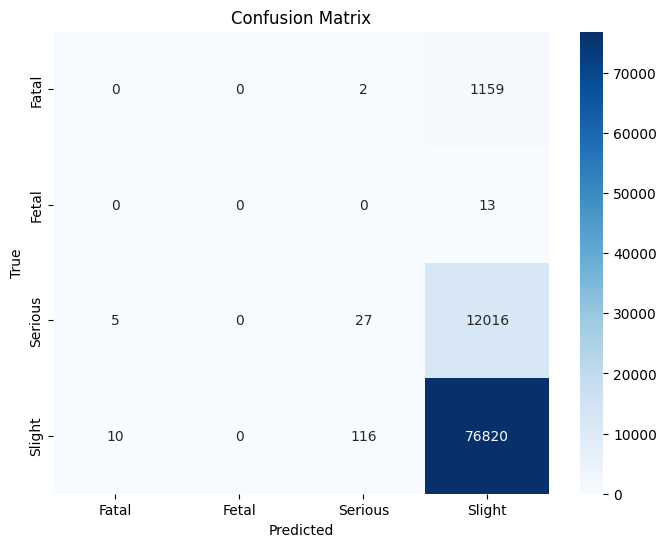

<ipython-input-14-0b00e5534fd1>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette="viridis")


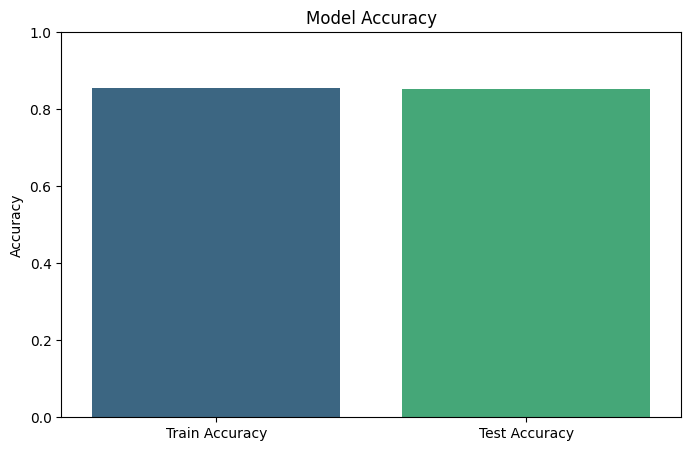

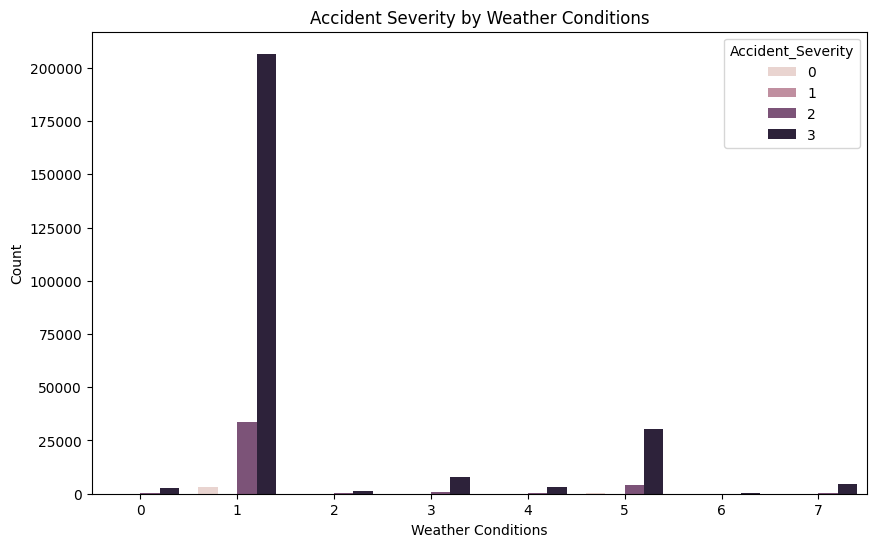

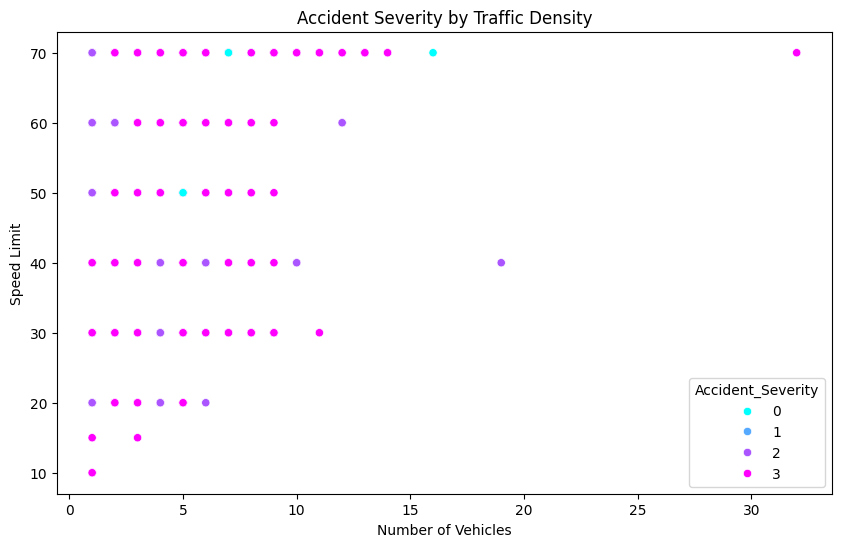

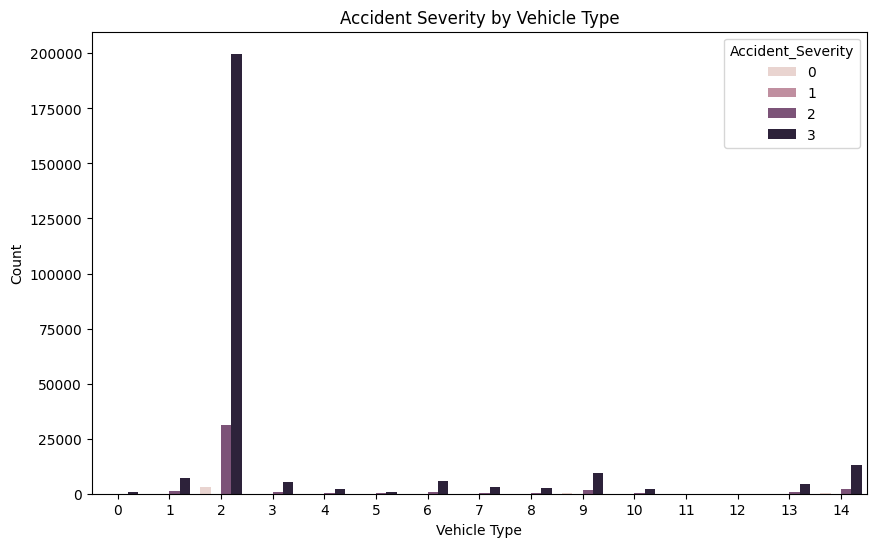

High-risk areas based on Weather Conditions and Traffic:
   Weather_Conditions  Number_of_Vehicles  Road_Type
2                   1                   2          3
5                   1                   2          3
7                   1                   1          0
8                   1                   1          3
9                   3                   1          3
Recommendation: Avoid routes with high traffic density during bad weather conditions.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/Road Accident Data.csv")

# Step 1: Data Cleaning
# Drop rows with missing critical values
data = data.dropna(subset=['Weather_Conditions', 'Vehicle_Type', 'Number_of_Vehicles', 'Road_Type'])

# Fill missing values in 'Road_Surface_Conditions' with the most frequent value
data['Road_Surface_Conditions'].fillna(data['Road_Surface_Conditions'].mode()[0], inplace=True)

# Step 2: Feature Selection
# Select relevant columns for prediction
selected_columns = [
    'Weather_Conditions', 'Number_of_Vehicles', 'Road_Type',
    'Speed_limit', 'Urban_or_Rural_Area', 'Vehicle_Type', 'Accident_Severity'
]
data = data[selected_columns]

# Encode categorical variables
encoder = LabelEncoder()
for col in ['Weather_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Vehicle_Type', 'Accident_Severity']:
    data[col] = encoder.fit_transform(data[col])

# Step 3: Define Features and Target
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']

# Normalize numeric features
scaler = StandardScaler()
X[['Number_of_Vehicles', 'Speed_limit']] = scaler.fit_transform(X[['Number_of_Vehicles', 'Speed_limit']])

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy)

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Visualize Accuracy
accuracies = [accuracy_score(y_train, model.predict(X_train)), accuracy]
labels = ['Train Accuracy', 'Test Accuracy']
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=accuracies, palette="viridis")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Step 8: Visualizations
# Risk Levels by Weather Conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Conditions', hue='Accident_Severity', data=data)
plt.title("Accident Severity by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Count")
plt.show()

# Traffic Density and Accident Severity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Number_of_Vehicles'], y=data['Speed_limit'], hue=data['Accident_Severity'], palette="cool")
plt.title("Accident Severity by Traffic Density")
plt.xlabel("Number of Vehicles")
plt.ylabel("Speed Limit")
plt.show()

# Accident Severity by Vehicle Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Type', hue='Accident_Severity', data=data)
plt.title("Accident Severity by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()

# Step 9: Recommendations
# Identify high-risk zones
high_risk = data[data['Accident_Severity'] == data['Accident_Severity'].max()]
print("High-risk areas based on Weather Conditions and Traffic:")
print(high_risk[['Weather_Conditions', 'Number_of_Vehicles', 'Road_Type']].head())

# Example: Alternate Routes (Dummy Implementation)
print("Recommendation: Avoid routes with high traffic density during bad weather conditions.")
